In [130]:
from modules import solve_sdos_adv as slvadv
from modules import solve_sdos as slvsdos
from scipy.sparse.linalg import lsmr
from scipy.signal import savgol_filter
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [131]:
data=loadtxt("./Data/data.txt")

In [132]:
v=data[:,0]
didv=data[:,1]

<IPython.core.display.Javascript object>


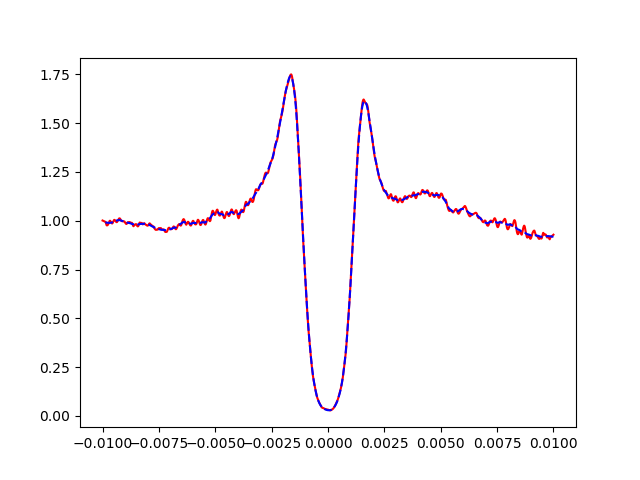

<IPython.core.display.Javascript object>


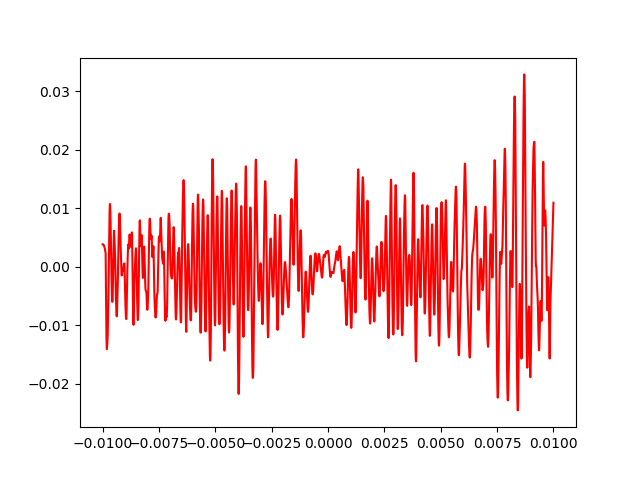

In [133]:
sdidv=savgol_filter(didv,81,2)
figure()
plot(v,didv,'r-')
plot(v,sdidv,'b--')
figure()
plot(v,didv-sdidv,'r-')

In [26]:
guess=[1e-5,3e-3,1.]
lb=[1e-6,1e-3,0.]
ub=[5e-4,5e-3,3.]
par=slvadv.get_params(v,sdidv,guess,lb,ub)

In [31]:
par

array([  8.72078687e-05,   1.33764406e-03,   2.59022598e+00])

In [139]:
rec_didv=slvadv.get_rec_dIdV(v,par[0],par[1],par[2],sdidv)
rec_didvg=slvadv.get_rec_dIdV(v,1e-4,1.28e-3,2.1,sdidv)

<IPython.core.display.Javascript object>


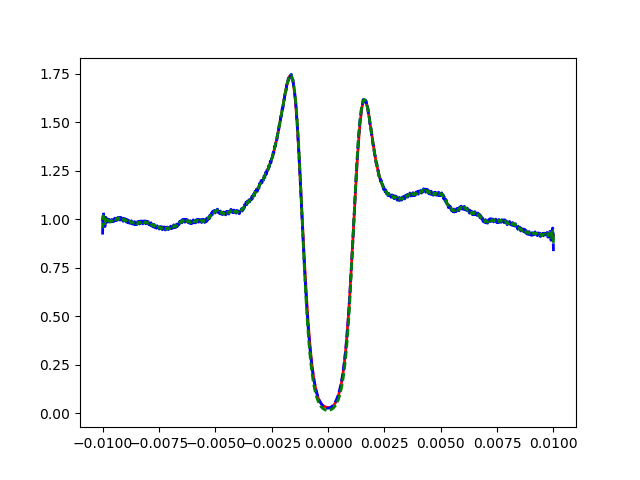

<IPython.core.display.Javascript object>


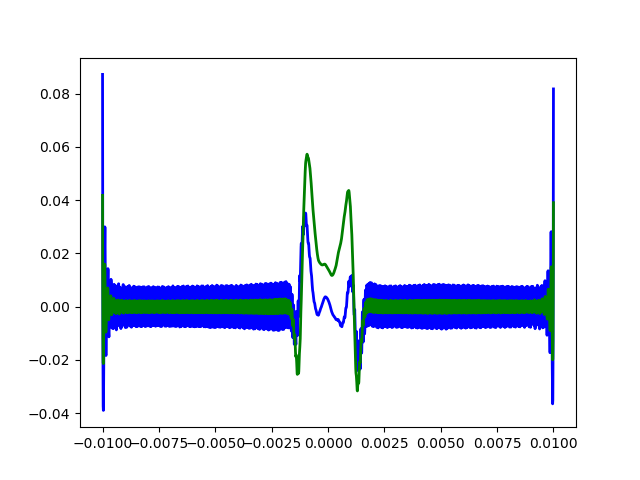

In [142]:
figure()
plot(v,sdidv,'r-',lw=2)
plot(v,rec_didv,'b--',lw=2)
plot(v,rec_didvg,'g--',lw=2)
figure()
plot(v,sdidv-rec_didv,'b-',lw=2)
plot(v,sdidv-rec_didvg,'g-',lw=2)

In [137]:
Ep,C=slvsdos.get_mat(v,par[0],par[1],par[2])
sdos=lsmr(C,sdidv,atol=1e-4,btol=1e-4)[0]
Ep,C=slvsdos.get_mat(v,1e-4,1.28e-3,2.1)
sdosg=lsmr(C,sdidv,atol=1e-4,btol=1e-4)[0]

<IPython.core.display.Javascript object>


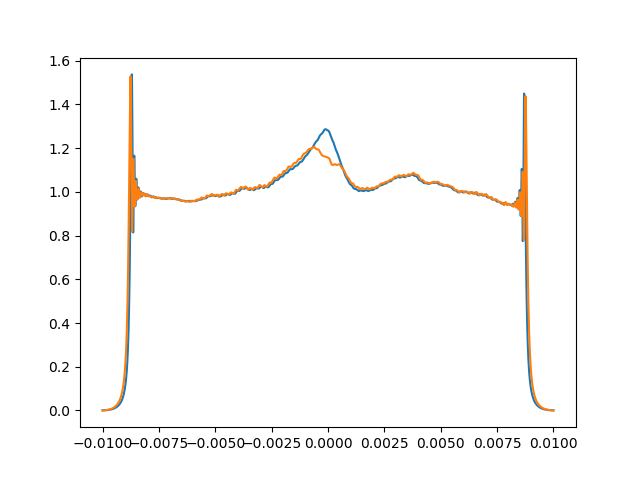

<IPython.core.display.Javascript object>


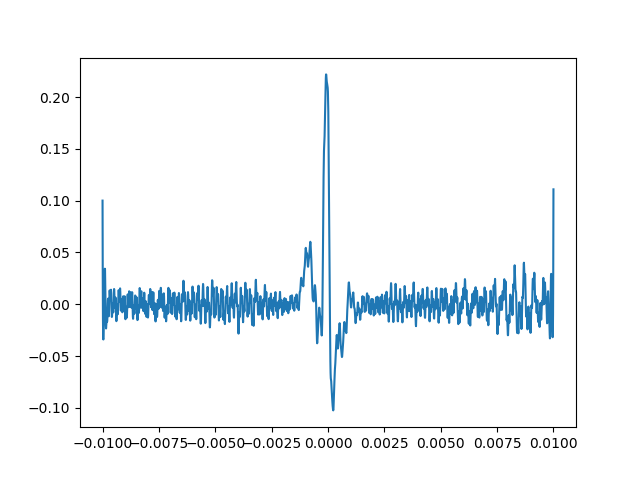

In [138]:
figure()
plot(Ep,sdos)
plot(Ep,sdosg)
#plot(v,didv)
#plot(v,rec_didv)

figure()
plot(v,(didv-rec_didv)/rec_didv)

In [41]:
from scipy.interpolate import interp1d

In [113]:
x=Ep[abs(Ep)<0.0075]+0.001
y=savgol_filter(sdos[abs(Ep)<0.0075],301,2)
fn=interp1d(x,y,kind="cubic",bounds_error=False,fill_value=(y[0],y[-1]))
tempe=linspace(min(Ep),max(Ep),100)
simdos=fn(tempe) ; print np.size(simdos)

100


<IPython.core.display.Javascript object>


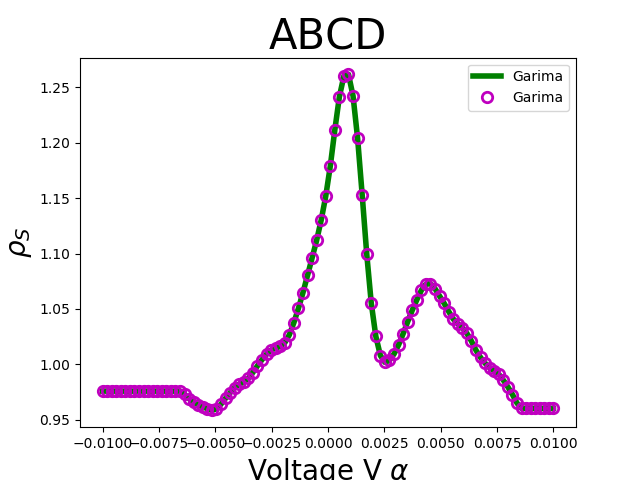

In [129]:
figure()
plot(tempe,simdos,"g-",lw=4,label="Garima")
plot(tempe,simdos,".",ms=15,mfc="none",mec="m",mew=2,label="Garima")
legend(loc=0)
xlabel(r"Voltage V $\alpha$",fontsize=20)
ylabel(r"$\rho_{S}$",fontsize=20)
title("ABCD",fontsize=30)

In [100]:
E,C=slvsdos.get_mat(v,par[0],par[1],par[2],E_sampling=np.size(simdos))
#simdos[:]=1.
sim_dIdV=np.array(np.matrix(C)*np.transpose(np.matrix(simdos))).flatten()

<IPython.core.display.Javascript object>


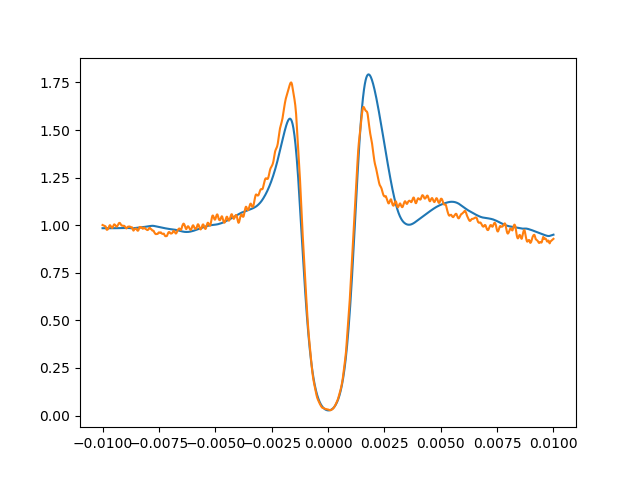

In [101]:
figure()
plot(v,sim_dIdV)
plot(v,didv)